<a href="https://colab.research.google.com/github/Curovearth/Fake-or-Real-News/blob/main/Fake_or_Real_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Fake or Real News**
---

### What needs to be done?


@ 09 August 2022

1.   Downloading the Dataset from Kaggle

* Go to your kaggle account
* expire token such that previous tokens get expired
* create new token (downloads kaggle.json) 
2.   Make sure to export the dataset on to Drive link such that it'll get stored there

@ 10 August 2022

1. Reading and analysing the dataset

@ 11 August 2022

1. Graph displaying a comparison over the length of the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


---
### Setting up the Libraries

In [ ]:
import numpy as np
import os
import pandas as pd


*   *warnings.filterwarnings(action='ignore')* → never print matching warnings
*   *plotly* → Helpful in building figures
*   *seaborn* → Statistical data visualisation
*   *rcParams* → Runtime configuration settings 

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

**spacy**: library for advanced Naturual Language Processing in python

*'en_core_web_sm'*

*   en → English
*   core → Vocabulary, syntax, entities
*   web → written text(blogs, news, comments)
*   sm → 12 mb



In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

---
### Accessing the directory comprising the dataset

In [ ]:
list_of_files = []
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/LSM and TARP '):
  list_of_files.append(filenames)
tarp_content = list_of_files[0]
for filename in tarp_content:
  print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/LSM and TARP /Cell Segmentation Data/images/fake2.csv
/content/gdrive/MyDrive/LSM and TARP /Cell Segmentation Data/images/fake_or_real_news.csv
/content/gdrive/MyDrive/LSM and TARP /Cell Segmentation Data/images/Fake.csv
/content/gdrive/MyDrive/LSM and TARP /Cell Segmentation Data/images/True.csv
/content/gdrive/MyDrive/LSM and TARP /Cell Segmentation Data/images/news_articles.csv


---
### Analysing the Dataset

In [ ]:
true_df = pd.read_csv("/content/gdrive/MyDrive/LSM and TARP /True.csv")
print('length of the dataset:',len(true_df))
print('-----------------------------------------------------')
print(true_df.head(5))

length of the dataset: 21417
-----------------------------------------------------
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [ ]:
false_df = pd.read_csv("/content/gdrive/MyDrive/LSM and TARP /Fake.csv")
print('length of the dataset:',len(false_df))
print('-----------------------------------------------------')
print(false_df.head(5))

length of the dataset: 23481
-----------------------------------------------------
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


---
## Visualising Datasets

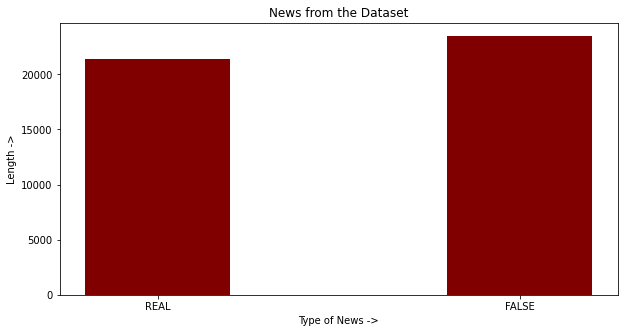

In [ ]:
bar_data = {'REAL': len(true_df),'FALSE': len(false_df)}
news = list(bar_data.keys())
val = list(bar_data.values())

fig = plt.figure(figsize=(10,5))

# Creating the bar plot
plt.bar(news, val, color='maroon',width=0.4)
plt.xlabel('Type of News ->')
plt.ylabel('Length ->')
plt.title('News from the Dataset')
plt.show()

In [ ]:
colors = ['gold','mediumturquoise']

fig = go.Figure(data=[go.Pie(labels=news, values=val, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Target Balance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

---

In [ ]:
true_df['class'] = 1    # adding another column 'class' and assigning every value as 1
false_df['class'] = 0   # adding another column 'class' and assigning every value as 0

# concatenate pandas object along a particular axis 
fake_news_df = pd.concat([true_df, false_df])

In [ ]:
print(fake_news_df[21415:21419])  # how the concatenation looks like

                                                   title  \
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   

                                                    text    subject  \
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   

                    date  class  
21415   August 22, 2017       1  
21416   August 22, 2017       1  
0      December 31, 2017      0  
1      December 31, 2017      0  


In [ ]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


---
## Sampling the dataframe

**Sample**:  to get a random sample of items from an axis of object

1.   *n* → used to specify the number of randomly selected rows or columns to be returned from the DataFrame.
2.   *random_state* → used to specify the seed value which will used in the random number generator

In [ ]:
fake_news_df = fake_news_df.sample(10000, random_state=786).reset_index(drop=True)

In [ ]:
fake_news_df.head()

,title,text,subject,date,class
0,Trump Is Now Officially Increasing The Chance...,Republicans aren t very smart about a lot of t...,News,"April 17, 2016",0
1,GAY PAYPAL CEO Gives Rousing Speech Endorsing ...,,politics,"Oct 31, 2016",0
2,"Buoyed by mayoral votes, Venezuela socialists ...",CARACAS (Reuters) - President Nicolas Maduro h...,worldnews,"December 10, 2017",1
3,Oklahoma lawmaker apologizes for linking Nativ...,"TULSA, Okla. (Reuters) - An Oklahoma state leg...",politicsNews,"April 28, 2016",1
4,Argentine mid-term campaign pauses after body ...,BUENOS AIRES (Reuters) - Major parties running...,worldnews,"October 18, 2017",1


In [ ]:
print(len(fake_news_df))

10000


---
### Checking Target Balance

In [ ]:
colors = ['gold','mediumturquoise']
labels = ['REAL','FAKE']
values = fake_news_df['class'].value_counts()/fake_news_df['class'].shape[0]

print('value counts:\n',fake_news_df['class'].value_counts())
print('shape[0] for fake_news_df[\'class\']:', fake_news_df['class'].shape[0])

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Target Balance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

value counts:
 0    5234
1    4766
Name: class, dtype: int64
shape[0] for fake_news_df['class']: 10000


Target seems to be well balanced !


---
## NLP text classification using PyCaret

**What is NLP?** [(Source)](http://www.pycaret.org/tutorials/html/NLP101.html)

Natural Language Processing (NLP in short) is a branch of artificial intelligence that deals with analyzing, understanding and generating the languages that humans use naturally in order to interface with computers in both written and spoken contexts using natural human languages instead of computer languages

**PyCaret** → low code ML library, spending less time on coding and more time on analysis.
[[Ref]](https://pycaret.org/)
> PyCaret and NLP → https://pycaret.gitbook.io/docs/

For installing pycaret run the following command before `!pip install pycaret`

### Setting up

In [ ]:
!pip install pycaret[full]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.2 MB/s 
     |████████████████████████████████| 1.3 MB 63.8 MB/s 
     |████████████████████████████████| 6.8 MB 60.0 MB/s 
     |████████████████████████████████| 10.4 MB 51.7 MB/s 
     |████████████████████████████████| 134 kB 75.8 MB/s 
     |████████████████████████████████| 88 kB 8.8 MB/s 
     |████████████████████████████████| 167 kB 74.8 MB/s 
     |████████████████████████████████| 3.3 MB 60.4 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 2.0 MB 53.8 MB/s 
     |████████████████████████████████| 262 kB 79.9 MB/s 
     |████████████████████████████████| 636 kB 64.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 17.0 MB 59.1 MB/s 
     |████████████████████████████████| 1.7 MB 64.5 MB/s 
  Installing build dependencies ..

In [ ]:
from pycaret.nlp import *

fake_news_nlp = setup(data = fake_news_df, target='text',session_id=123)

Description,Value
session_id,123
Documents,10000
Vocab Size,40200
Custom Stopwords,False


INFO:logs:setup() succesfully completed......................................


Once the setup is succesfully executed it prints the information grid with the following information:

* `session_id` : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment session_id is set as 123 for later reproducibility.

* `Documents` : Number of documents (or samples in dataset if dataframe is passed).

* `Vocab Size` : Size of vocabulary in the corpus after applying all text pre-processing such as removal of stopwords, bigram/trigram extraction, lemmatization etc.

---

## **Latent Dirichlet Allocation**

* Popular form of statistical topic modeling where documents are represented as a mixture of topics and a topic is a bunch of words. Those topics reside within a hidden, also known as a latent layer.

### *Why do we need LDA?*

Stating an example
* I want to find out the news highlights of France in 2018. I'm given a dataset which contains all the news articles of the country from 2018
* I make use of LDA to find out topics
* eg. France won 2018 World cup

> Therefore, by annotating the document, based on the topics predicted by the modeling method, we are able to optimize our search process

### *How do we do LDA?*

1.  Create a collection of documents from news articles
2.  Each documents represents a new article
3.  Data cleaning is the next step
   * Tokenizing: converting a document to its atomic elements
   * Stopping: removing meaningless words
   * Stemming: merging words that are equivalent in meaning.

> For more understanding visit this amazing article: [towardsdatascience on LDA](https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2)



## **How does LDA work?**

There are 2 parts in LDA


1.   The words that belong to a document, that we already know
2.   The words that belong to a topic or the probability of words belonging into a topic, that we need to calculate.

### *Algorithm for the latter*

* Parse through each document and randomly assign each word in the doc to one of the k topics(k to be chose beforehand)
* For each doc d, go through each word w and compute the following:

   1. `p(topic t | document d)` : the proportion of words in document d that are assigned to topic t. 
   2. `p(word w | topic t)` : the proportion of assignments to topic t over all documents that come from this word w.Tries to capture how many documents are in topic t because of word w. 


In [ ]:
lda = create_model('lda', multi_core=True)

INFO:logs:LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100)
INFO:logs:create_model() succesfully completed......................................


---
### Embedding on the processed text data

In [ ]:
lda_df = assign_model(lda)

INFO:logs:(10000, 11)
INFO:logs:assign_model() succesfully completed......................................


---
### Plotting the trained Model

> This function takes a trained model object (optional) and returns a plot based on the inferred dataset by internally calling assign_model before generating a plot. Where a model parameter is not passed, a plot on the entire dataset will be returned instead of one at the topic level. As such, plot_model can be used with or without model. All plots with a model parameter passed as a trained model object will return a plot based on the first topic i.e. ‘Topic 0’. This can be changed using the topic_num param. 

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
plot_model(lda, plot='topic_distribution')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(fold=None, use_train_data=False, verbose=True, is_in_evaluate=False, display=None, display_format=None, estimator=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), feature_name=None, fit_kwargs=None, groups=None, label=False, plot=topic_distribution, plot_kwargs=None, save=False, scale=1, system=True)
INFO:logs:Checking exceptions


ValueError: ignored

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), plot=wordcloud, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: wordcloud
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(10000, 11)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting WordCloud()
INFO:logs:Rendering Visual


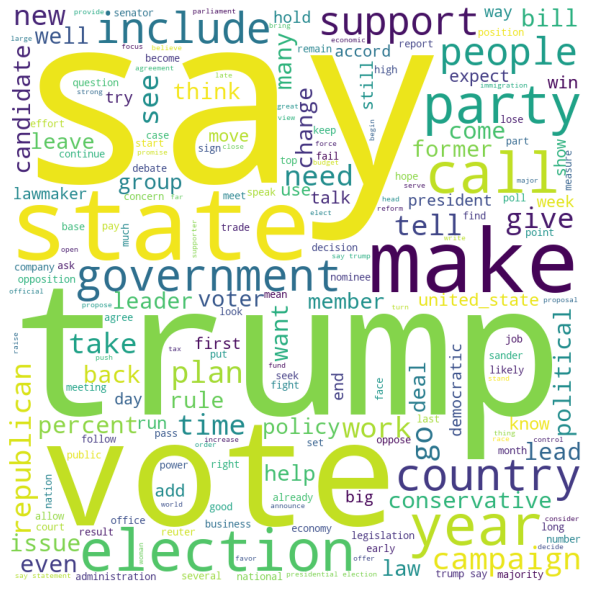

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lda, plot='wordcloud')

In [ ]:
plot_model(lda, plot='bigram')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(fold=None, use_train_data=False, verbose=True, is_in_evaluate=False, display=None, display_format=None, estimator=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), feature_name=None, fit_kwargs=None, groups=None, label=False, plot=bigram, plot_kwargs=None, save=False, scale=1, system=True)
INFO:logs:Checking exceptions


ValueError: ignored

In [ ]:
lda_df.drop(["text","title","subject","date"],axis=1, inplace=True, errors='ignore')

---
## Building the Model

In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
from pycaret.classification import *

setup(data=lda_df,target='class', silent=True)

,Description,Value
0,session_id,6752
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

([], [<pandas.io.formats.style.Styler at 0x7f6769ec8f50>], 2645    1
 8713    0
 463     0
 3828    1
 2159    0
        ..
 8703    1
 3825    1
 8244    0
 9126    1
 816     0
 Name: class, Length: 6999, dtype: int64, None, 10, 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 9995    0
 9996    0
 9997    0
 9998    1
 9999    1
 Name: class, Length: 10000, dtype: int64, 'clf-default-name', [('Setup Config',
                                  Description             Value
   0                               session_id              6752
   1                                   Target             class
   2                              Target Type            Binary
   3                            Label Encoded              None
   4                            Original Data        (10000, 7)
   5                           Missing Values             False
   6                         Numeric Features                 5
   7                     Categorical Features           

In [ ]:

compare_models(sort='Accuracy',n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8808,0.9494,0.8671,0.8804,0.8735,0.7609,0.7612,0.760
catboost,CatBoost Classifier,0.8807,0.9493,0.8683,0.8791,0.8735,0.7606,0.7609,3.605
rf,Random Forest Classifier,0.8797,0.9442,0.8658,0.8792,0.8723,0.7586,0.7590,0.990
lightgbm,Light Gradient Boosting Machine,0.8796,0.9487,0.8689,0.8767,0.8725,0.7584,0.7588,0.284
xgboost,Extreme Gradient Boosting,0.8787,0.9465,0.8640,0.8787,0.8711,0.7566,0.7570,0.651
lr,Logistic Regression,0.8748,0.9405,0.8815,0.8587,0.8698,0.7494,0.7499,0.446
ada,Ada Boost Classifier,0.8743,0.9440,0.8619,0.8722,0.8668,0.7478,0.7482,0.392
lda,Linear Discriminant Analysis,0.8711,0.9379,0.8800,0.8531,0.8662,0.7420,0.7425,0.021
ridge,Ridge Classifier,0.8707,0.0000,0.8800,0.8523,0.8658,0.7411,0.7417,0.014
svm,SVM - Linear Kernel,0.8698,0.0000,0.8673,0.8598,0.8634,0.7391,0.7394,0.024


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6752, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), <catboost.core.CatBoostClassifier object at 0x7f676adbc090>, RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=N

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=6752, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,


In [ ]:
catboost = create_model('catboost',verbose=False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=catboost, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:CatBoost Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17

In [ ]:
lightgbm = create_model('lightgbm',verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 18
INFO:logs:master_model_c

---
### Interpreting the Model

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x7f6752c908d0>, use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


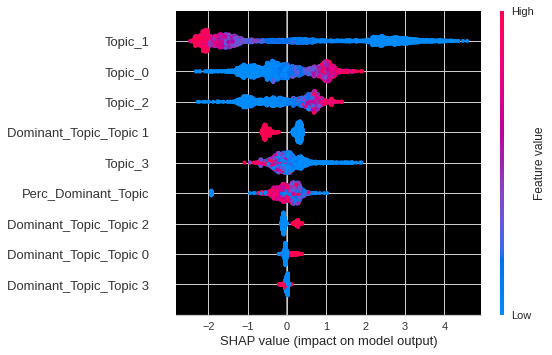

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
with plt.rc_context({'axes.facecolor':'black'}):
  interpret_model(catboost)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6752, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


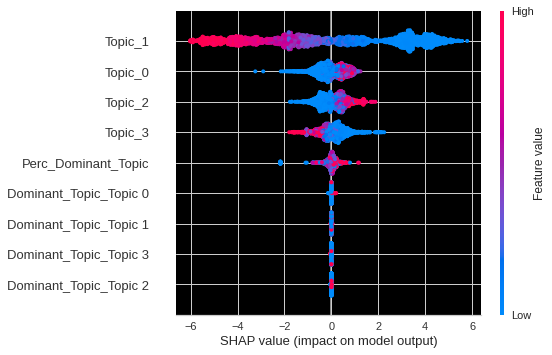

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
with plt.rc_context({'axes.facecolor':'black'}):
    interpret_model(lightgbm)

---
## Tuning Hyperparameters

In [ ]:
%time
tuned_catboost = tune_model(catboost, optimize = 'Accuracy', early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9590,0.8795,0.9068,0.8930,0.7992,0.7995
1,0.8829,0.9447,0.8765,0.8765,0.8765,0.7651,0.7651
2,0.8614,0.9401,0.8554,0.8529,0.8541,0.7222,0.7222
3,0.8871,0.9476,0.8705,0.8892,0.8798,0.7735,0.7736
4,0.8829,0.9462,0.8645,0.8858,0.8750,0.7648,0.7650
5,0.8786,0.9484,0.8765,0.8687,0.8726,0.7566,0.7566
6,0.8829,0.9524,0.8645,0.8858,0.8750,0.7648,0.7650
7,0.8800,0.9556,0.8852,0.8643,0.8746,0.7596,0.7598
8,0.8629,0.9354,0.8822,0.8367,0.8588,0.7257,0.7266


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 6
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7f6759ab3110>
INFO:logs:tune_model() succesfully completed......................................


---
## Voting Classifier

In [ ]:
blend_soft = blend_models(estimator_list = [lightgbm,catboost], optimize = 'Accuracy',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9599,0.8735,0.9119,0.8923,0.7991,0.7997
1,0.8814,0.9447,0.8765,0.8739,0.8752,0.7623,0.7623
2,0.8700,0.9415,0.8765,0.8534,0.8648,0.7397,0.7399
3,0.8829,0.9512,0.8584,0.8906,0.8742,0.7647,0.7651
4,0.8729,0.9469,0.8524,0.8762,0.8641,0.7447,0.7449
5,0.8757,0.9502,0.8765,0.8635,0.8700,0.7510,0.7510
6,0.8843,0.9521,0.8554,0.8959,0.8752,0.7674,0.7682
7,0.8829,0.9562,0.8912,0.8651,0.8780,0.7654,0.7657
8,0.8614,0.9365,0.8640,0.8462,0.8550,0.7223,0.7225


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 7
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=6752, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

---

## Calibrating Model

In [ ]:
cali_model = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8957,0.9608,0.8705,0.9060,0.8879,0.7905,0.7910
1,0.8886,0.9463,0.8795,0.8848,0.8822,0.7765,0.7765
2,0.8643,0.9412,0.8705,0.8475,0.8588,0.7282,0.7285
3,0.8886,0.9502,0.8614,0.8994,0.8800,0.7761,0.7767
4,0.8771,0.9480,0.8584,0.8796,0.8689,0.7533,0.7535
5,0.8743,0.9522,0.8675,0.8675,0.8675,0.7479,0.7479
6,0.8829,0.9536,0.8554,0.8931,0.8738,0.7646,0.7652
7,0.8857,0.9568,0.8912,0.8702,0.8806,0.7710,0.7712
8,0.8629,0.9386,0.8761,0.8406,0.8580,0.7255,0.7261


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 8
INFO:logs:CalibratedClassifierCV(base_estimator=VotingClassifier(estimators=[('lightgbm',
                                                                    LGBMClassifier(boosting_type='gbdt',
                                                                                   class_weight=None,
                                                                                   colsample_bytree=1.0,
                                                                                   importance_type='split',
                                                                                   learning_rate=0.1,
                                                                                   max_depth=-1,
                                                                                   min_child_samples=20,
                                                                                 

In [ ]:
final_model = finalize_model(cali_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=CalibratedClassifierCV(base_estimator=VotingClassifier(estimators=[('lightgbm',
                                                                    LGBMClassifier(boosting_type='gbdt',
                                                                                   class_weight=None,
                                                                                   colsample_bytree=1.0,
                                                                                   importance_type='split',
                                                                                   learning_rate=0.1,
                                                                                   max_depth=-1,
                                                                                   min_child_samples=20,
                                                                                   min_child_weight=0.001,
              

---

## Plotting Results

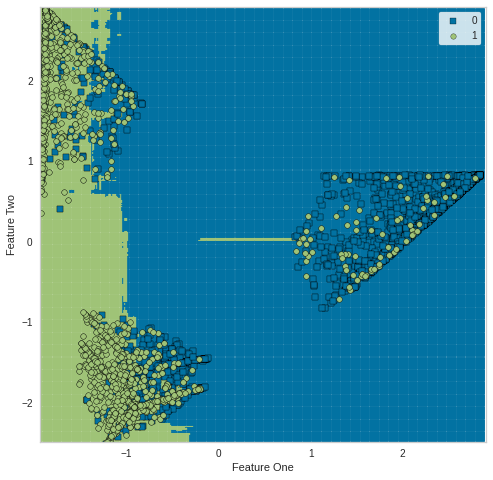

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='boundary')

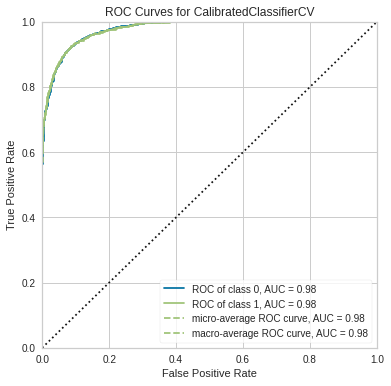

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='auc')

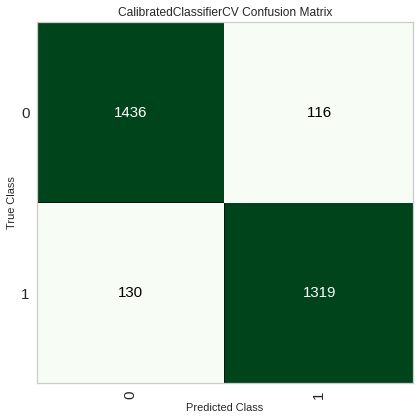

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='confusion_matrix')

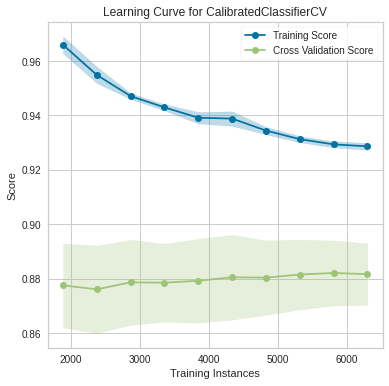

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='learning')